# X-Ray Detection for Pneumonia

Dataset From Kaggle:

In [6]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage.color import rgb2gray,gray2rgb
from skimage.transform import resize

In [7]:
path_train_normal = 'train/NORMAL/'
path_train_pneumonia = 'train/PNEUMONIA/'

In [8]:
pt_normal = os.listdir(path_train_normal)
n_normal = len(pt_normal)
print(n_normal)

1341


In [9]:
pt_pnemonia = os.listdir(path_train_pneumonia)
n_pneumonia = len(pt_pnemonia)
print(n_pneumonia)

3875


In [10]:
image_data ={'path':[],"condition":[]}

## Image Data for Normal X-Ray

In [11]:
for i in range(n_normal):
    img = plt.imread('train/NORMAL/'+pt_normal[i])/255
    reduced_img = resize(img,(150,150))
    reshaped_img = np.reshape(reduced_img,(-1,reduced_img.shape[1],1))
    image_data['path'].append(reshaped_img)
    image_data['condition'].append(0)

In [12]:
len(image_data['path'])

1341

In [13]:
len(image_data['condition'])

1341

## Image Data For Pneumonia X-Ray

In [14]:
for i in range(n_pneumonia):
    img = plt.imread('train/PNEUMONIA/'+pt_pnemonia[i])/255
    if(img.ndim>2):
        grayscale_img = rgb2gray(img)
    else:
        grayscale_img = img
    reduced_img = resize(grayscale_img,(150,150))
    reshaped_img = np.reshape(reduced_img,(-1,reduced_img.shape[1],1))
    image_data['path'].append(reshaped_img)
    image_data['condition'].append(1)

In [15]:
len(image_data['path'])

5216

In [16]:
len(image_data['condition'])

5216

In [17]:
X = np.array(image_data['path'])
Y = np.array(image_data['condition'])
print(X.shape)
print(Y.shape)

(5216, 150, 150, 1)
(5216,)


(150, 150, 1)


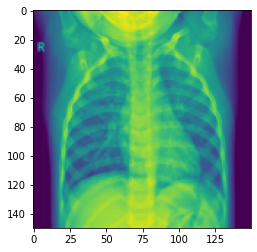

(150, 150, 1)


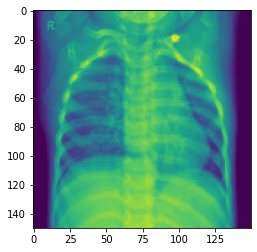

(150, 150, 1)


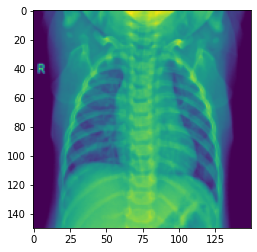

(150, 150, 1)


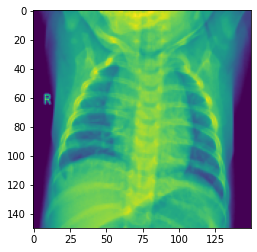

(150, 150, 1)


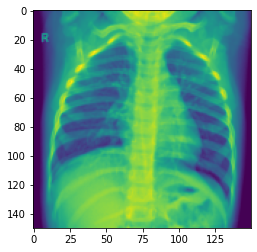

(150, 150, 1)


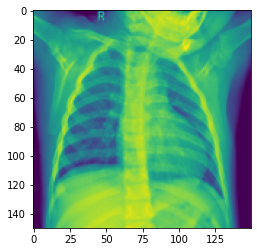

(150, 150, 1)


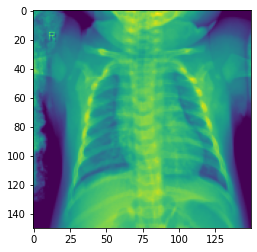

(150, 150, 1)


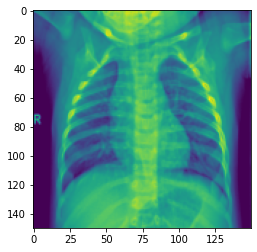

(150, 150, 1)


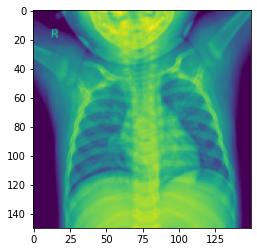

(150, 150, 1)


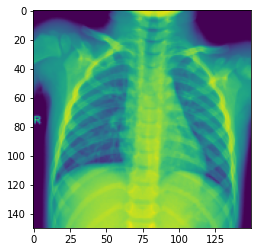

In [18]:
for i in range(10):
    print(X[i].shape)
    plt.imshow(X[i])
    plt.show()

## Extracting Data from Test:

In [19]:
path_test_normal = 'test/NORMAL/'
path_test_pneumonia = 'test/PNEUMONIA/'
pt_normal = os.listdir(path_test_normal)
n_normal = len(pt_normal)
print(n_normal)
pt_pnemonia = os.listdir(path_test_pneumonia)
n_pneumonia = len(pt_pnemonia)
print(n_pneumonia)
image_data ={'path':[],"condition":[]}

234
390


## Image Data for Normal and Pneumonia:


In [20]:
for i in range(n_normal):
    img = plt.imread('test/NORMAL/'+pt_normal[i])/255
    reduced_img = resize(img,(150,150))
    reshaped_img = np.reshape(reduced_img,(-1,reduced_img.shape[1],1))
    image_data['path'].append(reshaped_img)
    image_data['condition'].append(0)

In [21]:
for i in range(n_pneumonia):
    img = plt.imread('test/PNEUMONIA/'+pt_pnemonia[i])/255
    if(img.ndim>2):
        grayscale_img = rgb2gray(img)
    else:
        grayscale_img = img
    reduced_img = resize(grayscale_img,(150,150))
    reshaped_img = np.reshape(reduced_img,(-1,reduced_img.shape[1],1))
    image_data['path'].append(reshaped_img)
    image_data['condition'].append(1)

In [22]:
Xtest = np.array(image_data['path'])
Ytest = np.array(image_data['condition'])
print(Xtest.shape)
print(Ytest.shape)

(624, 150, 150, 1)
(624,)


(150, 150, 1)


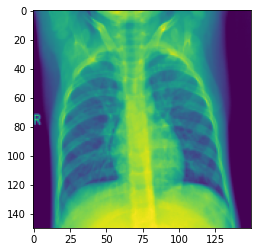

(150, 150, 1)


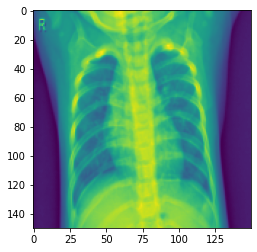

(150, 150, 1)


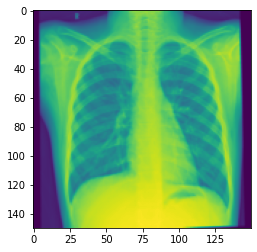

(150, 150, 1)


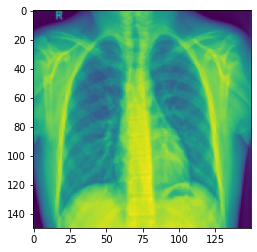

(150, 150, 1)


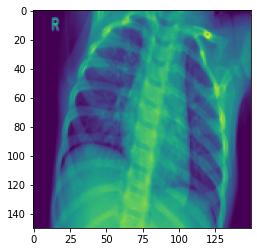

(150, 150, 1)


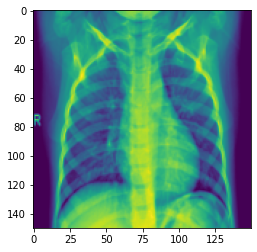

(150, 150, 1)


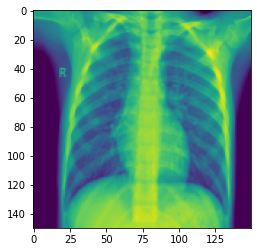

(150, 150, 1)


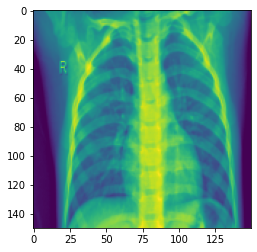

(150, 150, 1)


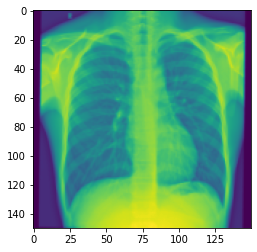

(150, 150, 1)


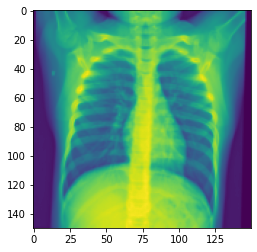

In [23]:
for i in range(10):
    print(Xtest[i].shape)
    plt.imshow(Xtest[i])
    plt.show()

## CNN Model Developement:

In [44]:
from keras.models import Sequential,model_from_json
from keras.layers import Dense,Conv2D,MaxPooling2D,Activation,Flatten,Dropout,BatchNormalization

In [64]:
model = Sequential()
model.add(Conv2D(128,kernel_size=3,activation='relu',input_shape=X.shape[1:]))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,kernel_size=3,activation='relu'))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_50 (Conv2D)          (None, 148, 148, 128)     1280      
                                                                 
 max_pooling2d_34 (MaxPoolin  (None, 74, 74, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_51 (Conv2D)          (None, 72, 72, 128)       147584    
                                                                 
 max_pooling2d_35 (MaxPoolin  (None, 36, 36, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_52 (Conv2D)          (None, 34, 34, 64)        73792     
                                                                 
 flatten_14 (Flatten)        (None, 73984)           

In [65]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [66]:
model.fit(X,Y,epochs=20,batch_size=128,validation_data=[Xtest,Ytest])

Epoch 1/20
5/5 [==============================] - 23s 5s/step - loss: 0.6894 - accuracy: 0.5625 - val_loss: 0.6622 - val_accuracy: 0.6250
Epoch 2/20
5/5 [==============================] - 22s 4s/step - loss: 0.6561 - accuracy: 0.6250 - val_loss: 0.6458 - val_accuracy: 0.7885
Epoch 3/20
5/5 [==============================] - 22s 5s/step - loss: 0.6142 - accuracy: 0.6843 - val_loss: 0.5482 - val_accuracy: 0.8237
Epoch 4/20
5/5 [==============================] - 22s 5s/step - loss: 0.4959 - accuracy: 0.7901 - val_loss: 0.4048 - val_accuracy: 0.8237
Epoch 5/20
5/5 [==============================] - 22s 5s/step - loss: 0.4671 - accuracy: 0.7981 - val_loss: 0.4089 - val_accuracy: 0.8125
Epoch 6/20
5/5 [==============================] - 22s 5s/step - loss: 0.3815 - accuracy: 0.8285 - val_loss: 0.3712 - val_accuracy: 0.8381
Epoch 7/20
5/5 [==============================] - 22s 5s/step - loss: 0.3639 - accuracy: 0.8301 - val_loss: 0.3088 - val_accuracy: 0.8670
Epoch 8/20
5/5 [==================

1/1 [==============================] - 0s 17ms/step
Actual : 1
Predicted : [[0.9998593]]


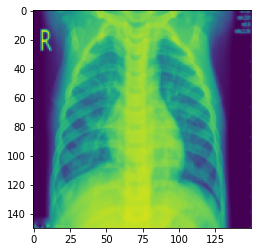

1/1 [==============================] - 0s 18ms/step
Actual : 1
Predicted : [[0.99092615]]


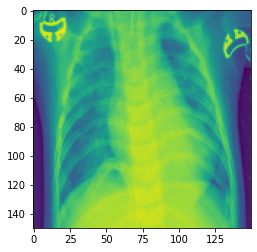

1/1 [==============================] - 0s 19ms/step
Actual : 0
Predicted : [[0.00906871]]


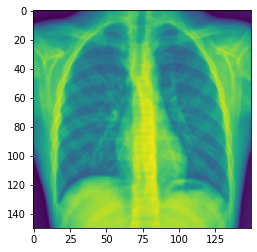

1/1 [==============================] - 0s 19ms/step
Actual : 1
Predicted : [[0.9237256]]


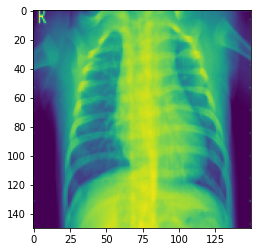

1/1 [==============================] - 0s 18ms/step
Actual : 1
Predicted : [[0.76966065]]


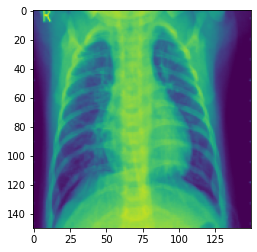

1/1 [==============================] - 0s 18ms/step
Actual : 0
Predicted : [[0.02751167]]


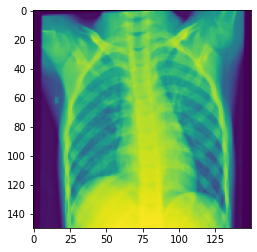

1/1 [==============================] - 0s 18ms/step
Actual : 0
Predicted : [[0.01706821]]


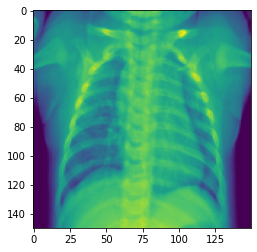

1/1 [==============================] - 0s 18ms/step
Actual : 1
Predicted : [[0.99984133]]


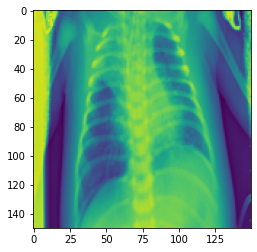

1/1 [==============================] - 0s 17ms/step
Actual : 1
Predicted : [[0.7715099]]


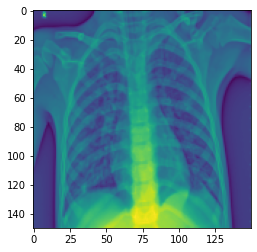

1/1 [==============================] - 0s 17ms/step
Actual : 1
Predicted : [[0.9475124]]


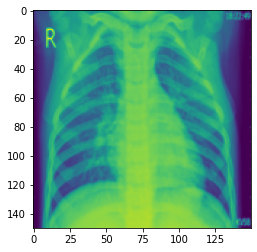

In [73]:
for i in range(10):
    numb = np.random.randint(len(Xtest))
    x_test = np.reshape(Xtest[numb],(1,150,150,1))
    y_pred = model.predict(x_test,batch_size=128)
    print("Actual :",Ytest[numb])
    print("Predicted :",y_pred)
    plt.imshow(Xtest[numb])
    plt.show()

In [71]:
model_json = model.to_json()
with open('x-ray-classifier.json','w') as f:
    f.write(model_json)

In [72]:
model.save_weights('x-ray-classifier_weights.h5')

Final Function for predicting new 

In [72]:
from skimage.transform import resize
from skimage.color import rgb2gray
import numpy as np
import matplotlib.pyplot as plt
from keras.models import model_from_json
json_file = open('x-ray-classifier.json','r')
loaded_model_json = json_file.read()
json_file.close()

model = model_from_json(loaded_model_json)
model.load_weights('x-ray-classifier_weights.h5')

def predictions(image):
    img = plt.imread(image)/255
    plt.imshow(img)
    plt.show()
    
    if img.ndim>2:
        gray_scale_img = rgb2gray(img)
    else:
        gray_scale_img = img
        
    resized_img = resize(gray_scale_img,(150,150))
    reshaped_img = np.reshape(resized_img,(1,150,150,1))
    y_pred = model.predict(reshaped_img)
    prediction = [1 if y_pred>0.5 else 0]
    print("Prediction:",prediction)